Привет!) Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добрый день, Дуолан) Рад слышать тебя снова. Мы ранее общались на одном из предыдущих проектов.
    
Благодарю за подробный разбор и комментарии.
    
Под каждым комментарием я написал, что исправил и в каком пункте искать.
    
Здесь также перечислю:
    
    - 3.1.1. OHE заменил на OrdinalEncoder, обученный только на трэйне.
    - 3.2.1. Для LightGBM использовал перевод категориальных признаков в тип category
    - 3.3.1. StandardScaler был мною использован изначально, возможно там что-то не так? 
    - И естественно вывод скорректирован в соответствии с изменением полученных значений.


</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️</b>
    
Привет! Тоже рад тебя видеть)
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Описание проекта
Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 

Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.


### Цель исследования:
- Построить модель, способную определять рыночную стоимость автомобиля.

### Задачи исследования:
- Изучить предоставленные данные и произвести предварительную обработку;
- Подготовить выюорки для обучения и тестирования моделей;
- Обучить модели ML, в том числе LightGBM.
- Проанализировать время обучения, время предсказания и качество моделей по показателю RMSE;
- Выбрать лучшую модель.


### Описание данных
- Данные находятся в файле /datasets/autos.csv
- Признаки
    - DateCrawled — дата скачивания анкеты из базы;
    - VehicleType — тип автомобильного кузова;
    - RegistrationYear — год регистрации автомобиля;
    - Gearbox — тип коробки передач;
    - Power — мощность (л. с.);
    - Model — модель автомобиля;
    - Kilometer — пробег (км);
    - RegistrationMonth — месяц регистрации автомобиля;
    - FuelType — тип топлива;
    - Brand — марка автомобиля;
    - Repaired — была машина в ремонте или нет;
    - DateCreated — дата создания анкеты;
    - NumberOfPictures — количество фотографий автомобиля;
    - PostalCode — почтовый индекс владельца анкеты (пользователя);
    - LastSeen — дата последней активности пользователя.

- Целевой признак
    - Price — цена (евро).

<div class="alert alert-block alert-success">
<b>Успех:</b> 

Отличное введение 👍 Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение :)
</div>

## Подготовка данных
### Импорт библиотек

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression

from lightgbm import LGBMRegressor

### Загрузка датасета

In [56]:
data = pd.read_csv('/datasets/autos.csv')


### Предварительная обработка данных
#### Информация и осмотр датасета

In [57]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


#### Преобразование типа данных
Дата публикации объявления получена в формате object. Приведём её к типу datetime чтоб обеспечить возможность сравнения дат.

Прочие даты (а именно - активности пользователя и скачивания объявления) в исследовании не участвуют, будут удалены ниже.

In [58]:
data['DateCreated'] = pd.to_datetime(data['DateCreated'])

#### Выявление дубликатов

In [59]:
data.duplicated().sum()

4

Обнаружено 4 дубликата, которые не помешают процессу ML, удалять их не будем.

#### Осмотр категориальных признаков и поиск неявных дубликатов

In [60]:
categorial = ['Brand', 'Model', 'VehicleType', 'Gearbox', 'FuelType', 'Repaired']

In [61]:
for column in categorial:
    print(column)
    print('length:', len(data[column].value_counts()))
    display(data[column].sort_values().value_counts())
    

Brand
length: 40


volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64

Model
length: 250


golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
serie_2                   8
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64

VehicleType
length: 8


sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

Gearbox
length: 2


manual    268251
auto       66285
Name: Gearbox, dtype: int64

FuelType
length: 7


petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64

Repaired
length: 2


no     247161
yes     36054
Name: Repaired, dtype: int64

В признаке 'Brand' значение sonstige_autos - с немецкого "прочие автомобили". 
Марка автомобиля - весьма важный фактор, определяющий стоимость.
С целью повышения качества машинного обучения все sonstige_autos будут удалены.

In [62]:
data = data.drop(data[data['Brand']=='sonstige_autos'].index).reset_index(drop=True)

Дополнительно выведем полный отсортированный список моделей автомобилей с целью поиска ошибочных значений и неявных дубликатов.

In [63]:
sorted(data['Model'].unique().astype(str))

['100',
 '145',
 '147',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'alhambra',
 'almera',
 'altea',
 'amarok',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'beetle',
 'berlingo',
 'bora',
 'boxster',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_klasse',
 'c_max',
 'c_reihe',
 'caddy',
 'calibra',
 'captiva',
 'carisma',
 'carnival',
 'cayenne',
 'cc',
 'ceed',
 'charade',
 'cherokee',
 'citigo',
 'civic',
 'cl',
 'clio',
 'clk',
 'clubman',
 'colt',
 'combo',
 'cooper',
 'cordoba',
 'corolla',
 'corsa',
 'cr_reihe',
 'croma',
 'crossfire',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'ducato',
 'duster',
 'e_klasse',
 'elefantino',
 'eos',
 'escort',
 'espace',
 

Обращают на себя внимание модели other. Посмотрим отдельно на записи с таким значением:

In [64]:
data[data['Model']=='other']

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
24,2016-03-13 20:40:49,500,sedan,1990,manual,118,other,150000,10,petrol,mercedes_benz,yes,2016-03-13,0,35390,2016-03-13 20:40:49
38,2016-04-01 17:45:07,11900,other,2002,manual,129,other,150000,11,gasoline,volkswagen,no,2016-04-01,0,10551,2016-04-05 12:47:30
39,2016-03-25 15:50:30,1500,bus,1984,manual,70,other,150000,8,gasoline,mercedes_benz,no,2016-03-25,0,22767,2016-03-27 03:17:02
52,2016-04-04 10:57:36,1400,NaN,2016,manual,55,other,5000,1,NaN,hyundai,NaN,2016-04-04,0,34454,2016-04-06 12:45:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350918,2016-03-11 14:45:44,2500,small,2007,manual,60,other,125000,3,petrol,hyundai,NaN,2016-03-11,0,18107,2016-03-17 21:46:52
350930,2016-03-12 08:37:15,5990,bus,1984,auto,0,other,70000,4,petrol,chevrolet,NaN,2016-03-12,0,87600,2016-03-24 23:47:48
350944,2016-03-07 19:58:44,3300,coupe,1957,manual,40,other,100000,11,petrol,trabant,no,2016-03-07,0,10317,2016-03-08 06:45:48
350952,2016-03-12 16:48:14,12800,convertible,1991,manual,211,other,150000,7,petrol,porsche,no,2016-03-12,0,21147,2016-04-07 06:46:00


Этих данных достаточно много, возможно они получены в результате ошибок пользователей или того что данные модели отсутствовали в списке для выбора. Сохраним  эти данные.

Неявных дубликатов в категориальных признаках не выявлено
#### Поиск пропущенных значений.

In [65]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          36449
RegistrationYear         0
Gearbox              18730
Power                    0
Model                16331
Kilometer                0
RegistrationMonth        0
FuelType             31791
Brand                    0
Repaired             69831
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Выявлено от 16 до 70 тыс. пропусков в 5 категориальных признаках.
Учитывая, что размер датасета достаточно велик - более 354 тысяч записей, предложено посчитать записи с 4 и более пропусками и удалить их для повышения информативности данных для ML. На оставшиеся пропуски поставим заглушку unknown.

In [66]:
is_na = list(data.isna().sum()[data.isna().sum()>0].index)
is_na

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired']

In [67]:
index_to_drop = data[data[is_na].isna().sum(axis=1)>=4].index
len(index_to_drop)

7101

#### Удаление пропусков
Выявлено 7101 записей с пропущенными 4 или 5 полями. Размер датасета позволяет нам удалить эти данные.


In [68]:
data = data.drop(index_to_drop).reset_index(drop=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343894 entries, 0 to 343893
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        343894 non-null  object        
 1   Price              343894 non-null  int64         
 2   VehicleType        314259 non-null  object        
 3   RegistrationYear   343894 non-null  int64         
 4   Gearbox            331452 non-null  object        
 5   Power              343894 non-null  int64         
 6   Model              330690 non-null  object        
 7   Kilometer          343894 non-null  int64         
 8   RegistrationMonth  343894 non-null  int64         
 9   FuelType           318818 non-null  object        
 10  Brand              343894 non-null  object        
 11  Repaired           281063 non-null  object        
 12  DateCreated        343894 non-null  datetime64[ns]
 13  NumberOfPictures   343894 non-null  int64   

#### Заполнение оставшихся пропусков
Записи с 4 и более пропущенными категориальными полями удалены. На прочие пропуски поставим заглушку 'unknown'.

In [70]:
data.fillna('unknown', inplace=True)

In [71]:
print(data.isna().sum()) # проверяем количество пропусков


DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


В результате все пропуски устранены.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Пропуски успешно заполнены 👍 Модели теперь не будут капризничать)
</div>




#### Обработка количественных признаков

Рассмотрим статистики по количественным признакам и гистограммы их распределения:

In [72]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,343894.000000,343894.000000,343894.000000,343894.000000,343894.000000,343894.0,343894.000000
mean,4470.404311,2003.522335,111.992024,128940.981814,5.817473,0.0,50584.995432
std,4513.516910,43.801900,190.362529,36842.566748,3.681452,0.0,25760.446398
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1100.000000,1999.000000,71.000000,125000.000000,3.000000,0.0,30177.000000
50%,2800.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49477.000000
75%,6499.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71116.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


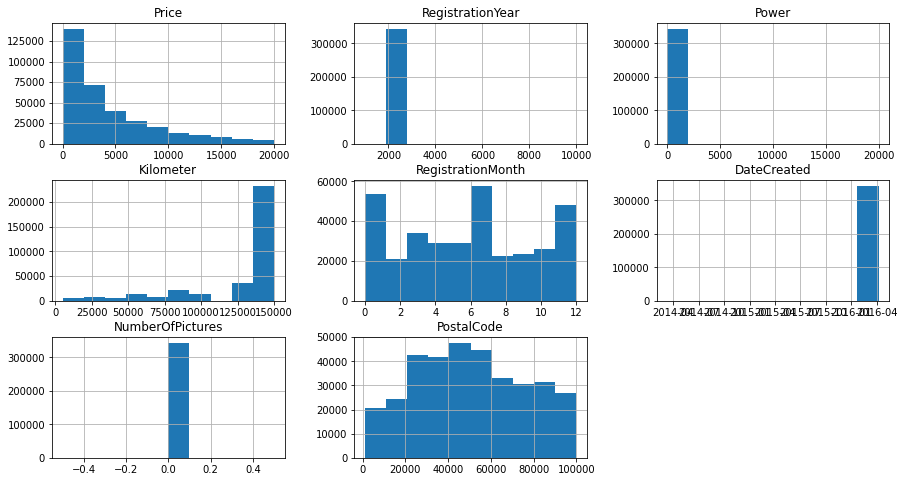

In [73]:
data.hist(figsize=[15,8]);

На основании гистограмм распределения признаков обнаружены аномалии в данных:
- максимальный обозначенный пробег - 150 000 км;
- в годе регистрации присутствуют значения от 1000 до 9999
- выбросы в показателе мощности: присутствуют нулевые значения и неестественно высокие - до 20000
- в цене присутствуют нулевые значения.

Обнаружены данные, не содержащие выбросов:
- Дата публикации объявления: не раньше 2014 и не позже 2016 года.

Также присутствуют данные, которые не будут участвовать в исследовании:
- месяц регистрации транспортного средства, т.к. для наших целей достаточно года;
- почтовый код;
- количество картинок, т.к. оно вообще не заполнено;
- дата скачивания объявления для датасета;
- дата появления автора объявления в сети.

##### Удаление неиспользуемых признаков
Ниже удалим неиспользуемые признаки:

In [74]:
data = data.drop(['PostalCode', 'NumberOfPictures', 'RegistrationMonth', 'DateCrawled', 'LastSeen'], axis=1)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343894 entries, 0 to 343893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             343894 non-null  int64         
 1   VehicleType       343894 non-null  object        
 2   RegistrationYear  343894 non-null  int64         
 3   Gearbox           343894 non-null  object        
 4   Power             343894 non-null  int64         
 5   Model             343894 non-null  object        
 6   Kilometer         343894 non-null  int64         
 7   FuelType          343894 non-null  object        
 8   Brand             343894 non-null  object        
 9   Repaired          343894 non-null  object        
 10  DateCreated       343894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 28.9+ MB


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

##### Исследование целевого признака

<AxesSubplot:>

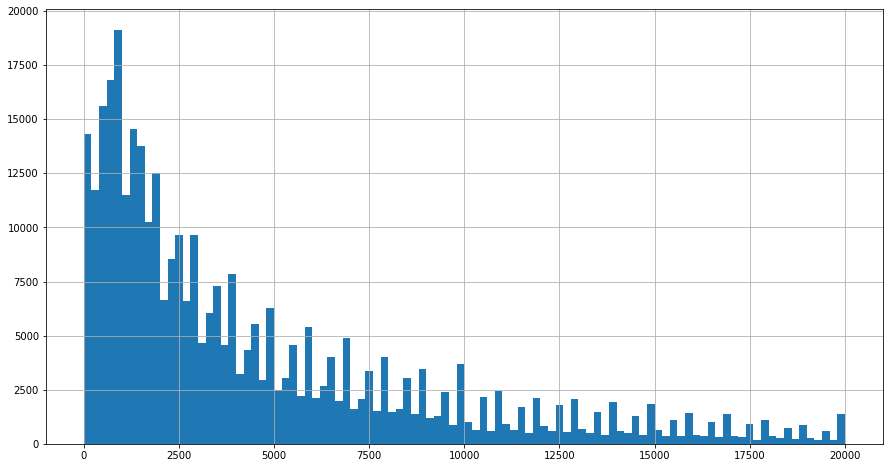

In [76]:
data['Price'].hist(bins=100, figsize=[15,8])

На гистограмме видно, что есть ряд записей с целевым признаком, равным 0. Машины стоимостью менее 50 евро удалим из датасета - вероятно, эти значения ошибочны.

In [77]:
data = data.drop(data[data['Price']<50].index).reset_index(drop=True)


<AxesSubplot:>

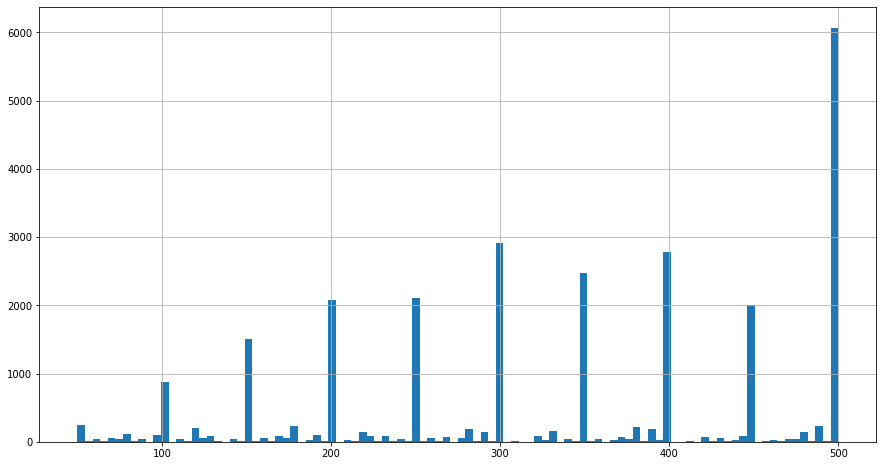

In [78]:
data['Price'].hist(bins=100, range=[50,500], figsize=[15,8])

Ниже подробно рассмотрим значения признаков для автомобилей дешевле 200 евро:

In [79]:
for column in ['Price', 'RegistrationYear', 'Model', 'Repaired']:

    
    display(data.loc[data['Price']<200][[column]].value_counts())


Price
150      1478
100       871
199       261
50        248
180       229
         ... 
106         1
142         1
108         1
112         1
128         1
Length: 73, dtype: int64

RegistrationYear
1997                578
1995                517
2000                498
1998                494
1996                453
1999                363
2016                340
1994                242
1993                168
2001                106
1992                102
1991                 89
1990                 69
2005                 54
2017                 54
2002                 41
1989                 25
2004                 18
2015                 14
2003                 14
2014                 14
2012                 10
1988                  8
2007                  7
2009                  7
2006                  6
1985                  6
2013                  6
2010                  5
1910                  5
2018                  4
1987                  4
1986                  4
1980                  4
1960                  3
1976                  3
1983                  3
1970                  3
1969                  2
2011                  2
2008                  2

Model   
corsa       542
polo        427
golf        347
unknown     331
other       289
           ... 
lybra         1
agila         1
scirocco      1
fabia         1
a5            1
Length: 133, dtype: int64

Repaired
unknown     1755
yes         1750
no           852
dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

Таким образом, среди "подозрительно дешевых" автомобилей преобладают автомобили после аварий и с неизвестной историей, а также относительно старые. Достоверно счесть эти данные ошибкой не представляется возможным, поэтому оставим их как есть.

##### Аномалии в признаке 'Kilometer'

[5000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 125000,
 150000]

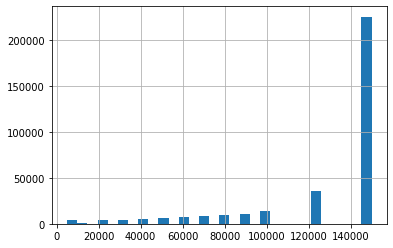

In [80]:
data['Kilometer'].hist(bins=30)
sorted(data['Kilometer'].unique())

Данный столбец содержит ряд особенностей:
- представлено небольшое количество уникальных значений;
- с ростом пробега увеличивается шаг между приближенными значениями;
- максимальное значение - 150 тыс. км - является самым часто встречемым. Вероятно, автомобили с пробегом более 150 тыс. км также отнесены к этой категории.

Для нужд ML при необходимости данный признак можно перевести в категориальный. Однако, в настоящее время такой необходимости нет. 

##### Аномалии в признаке 'RegistrationYear'

Сперва рассмотрим наиболее старые автомобили (до 1950 года)

In [81]:
data.loc[(data['RegistrationYear']<=1950)]['RegistrationYear'].value_counts() # | (data['RegistrationYear']>2016)]

1910    17
1950    11
1937     7
1945     3
1943     3
1938     3
1936     3
1932     3
1929     3
1933     2
1000     2
1935     2
1930     2
1500     2
1942     2
1928     2
1947     2
1923     2
1800     1
1234     1
1602     1
1941     1
1600     1
1949     1
1927     1
1940     1
1934     1
1931     1
1400     1
Name: RegistrationYear, dtype: int64

Выявлены явно ошибочные значения года регистрации и сравнительно небольшое количество машин с 1910 по 1950.

Чтобы разобраться, все ли данные ошибочны, рассмотрим полный список автомобилей, выпущенных до 1930 года включительно:

In [82]:
display(data.loc[(data['RegistrationYear']<=1930)])
data.loc[(data['RegistrationYear']<=1930)].shape

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
14,450,small,1910,unknown,0,ka,5000,petrol,ford,unknown,2016-03-11
17194,7999,unknown,1500,manual,224,impreza,5000,unknown,subaru,unknown,2016-03-09
22375,3900,wagon,1910,manual,90,passat,150000,petrol,volkswagen,unknown,2016-03-16
23052,50,small,1910,manual,0,unknown,5000,unknown,volkswagen,yes,2016-03-29
27789,80,small,1910,unknown,0,punto,150000,unknown,fiat,unknown,2016-03-22
33832,200,other,1910,unknown,0,caddy,150000,gasoline,volkswagen,unknown,2016-03-19
46103,600,small,1910,manual,0,agila,5000,unknown,opel,yes,2016-03-09
52952,950,unknown,1400,manual,1400,golf,125000,petrol,volkswagen,unknown,2016-03-30
59114,3400,small,1910,manual,90,beetle,90000,unknown,volkswagen,no,2016-03-07
70427,400,unknown,1910,unknown,60,golf,150000,petrol,volkswagen,unknown,2016-03-21


(36, 11)

Данные 36 записей вполне реально оценить самостоятельно. Можно сделать вывод, что среди них присутствуют как реальные дорогие ретро-автомобили с подобающими характеристиками, так и ошибочные записи. Среди записей до 1927 года не выявлено ни одной правдоподобной, так что они будут удалены.

In [83]:
data = data.drop(data[data['RegistrationYear']<1927].index).reset_index(drop=True)


Ниже рассмотрим записи, в которых год регистрации автомобиля превышает год публикации объявления.

In [84]:
index_to_drop = data.loc[(data['DateCreated'].dt.year) < (data['RegistrationYear'])].index

In [85]:
data.loc[index_to_drop,:]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
20,2900,unknown,2018,manual,90,meriva,150000,petrol,opel,no,2016-03-23
24,5555,unknown,2017,manual,125,c4,125000,unknown,citroen,no,2016-03-10
45,7750,unknown,2017,manual,80,golf,100000,petrol,volkswagen,unknown,2016-03-25
48,2000,unknown,2017,manual,90,punto,150000,gasoline,fiat,yes,2016-03-07
54,2399,unknown,2018,manual,64,other,125000,unknown,seat,no,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...
333639,3600,unknown,2017,manual,86,transit,150000,gasoline,ford,unknown,2016-03-11
333664,1000,unknown,2017,manual,101,a4,150000,unknown,audi,unknown,2016-03-29
333724,2140,unknown,2018,manual,80,fiesta,150000,unknown,ford,no,2016-03-17
333770,1250,unknown,2018,unknown,0,corsa,150000,petrol,opel,unknown,2016-03-25


In [86]:
data.loc[index_to_drop,:].describe()

,Price,RegistrationYear,Power,Kilometer
count,12676.000000,12676.000000,12676.000000,12676.000000
mean,3395.015620,2025.006232,91.039524,132916.929631
std,3480.645069,195.757382,258.128050,34820.386156
min,50.000000,2017.000000,0.000000,5000.000000
25%,1100.000000,2017.000000,50.000000,125000.000000
50%,2000.000000,2017.000000,82.000000,150000.000000
75%,4360.000000,2018.000000,120.000000,150000.000000
max,20000.000000,9999.000000,16011.000000,150000.000000


В полученной таблице доминируют автомобили с большим пробегом, а также присутствуют явно неверные значения года выпуска. 
Сделаем вывод, что год регистрации после года публикации объявления - ошибка.

Истинный год регистрации достоверно не известен, в то же время использовать заглушку "0" мы не можем, чтоб не нарушить веса признаков при ML.

В соответствии с этим, планируется данные значения заменить на медианные по модели автомобиля.

In [87]:
data.loc[index_to_drop, 'RegistrationYear'] = np.nan
# заменяем недостоверные значения на пропуски

Объявим функцию для группировки записей по выбранному признаку и заполнения пропусков медианным значением. 

In [88]:
def fill_median(df, groupby_feature, filled_feature): # на вход подаём датафрейм, подлежащий изменению,
                                                    # признак по которому группируем
                                                    # и признак, для которого будем рассчитывать медиану
    median_table = df.groupby(groupby_feature)[filled_feature].median()
    # эта таблица будет содержать медианы заполняемого признака, а индексом будут значения признака, по которому группируем
    for value in df[groupby_feature].unique():  
        df.loc[(df[groupby_feature]==value) & (df[filled_feature].isna()), filled_feature] = median_table[value]
    # отбираем строки, в которых заполняемый признак пропущен, заполняем.

    

In [89]:
fill_median(data, 'Model', 'RegistrationYear')

# вызываем функцию - заполняем пропуски в годе регистрации медианным значением по модели

In [90]:
data.loc[(data['DateCreated'].dt.year) < (data['RegistrationYear'])]

# проверяем, что ошибок в годе регистрации не осталось

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated


In [91]:
data.isna().sum()
# проверяем оставшиеся пропуски

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
DateCreated         0
dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для верхней границы используешь дату скачивания анкеты 👍
</div>

Таким образом, ошибки в годе регистрации удалены или заменены медианой.

##### Изучение выбросов в столбце 'Power'

<AxesSubplot:>

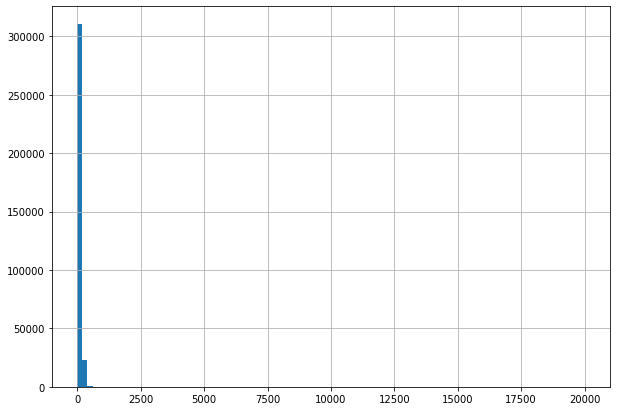

In [92]:
data['Power'].hist(figsize=[10,7], bins = 100)

Как видно из гистограммы, в этом признаке присутствуют значимые выбросы. Рассмотрим их ближе.

<AxesSubplot:>

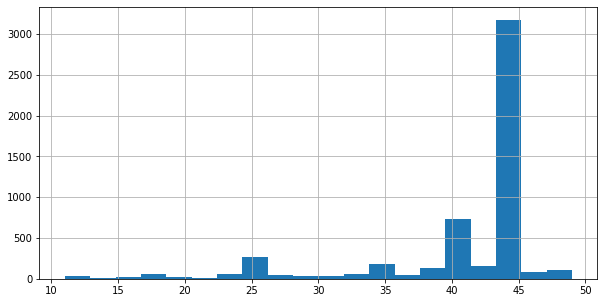

In [93]:
data[(data['Power']<50) & (data['Power']>10)]['Power'].hist(bins=20, figsize=[10,5])

Выведем информацию и количество автомобилей мощностью менее 30л.с. и более 10.

In [94]:
data[(data['Power']<30) & (data['Power']>10)]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
1168,4450,small,1971.0,manual,23,500,70000,petrol,fiat,no,2016-03-08
3215,2300,unknown,1987.0,manual,26,601,70000,unknown,trabant,no,2016-03-27
4359,870,wagon,2000.0,manual,16,focus,150000,unknown,ford,no,2016-03-21
5343,650,sedan,1985.0,manual,26,601,30000,petrol,trabant,yes,2016-03-16
5435,10000,unknown,1980.0,manual,26,601,40000,unknown,trabant,no,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...
328557,3500,sedan,1984.0,manual,26,601,70000,petrol,trabant,unknown,2016-03-13
328718,5690,small,2014.0,auto,18,other,10000,electric,renault,no,2016-03-07
328848,1000,sedan,1989.0,manual,26,601,80000,petrol,trabant,unknown,2016-03-25
333009,2900,small,1969.0,manual,18,500,5000,petrol,fiat,no,2016-03-26


Как видно из полученной таблицы, существует немалое количество таких записей, среди которых присутствуют реально существующие малолитражные автомобили с низкой мощностью - малые электромобили Рено, старинные малолитражки Трабант, Фиат и пр., а также ряд ошибок - возможно, вместо мощности указан объем двигателя.

Для получения более подробных сведений рассмотрим данные по автомобилям с мощностью менее 12 л.с.

In [95]:
data[(data['Power']<=12) & (data['Power']>0)]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
3148,1990,small,2004.0,unknown,7,polo,150000,gasoline,volkswagen,no,2016-03-29
9027,9000,sedan,2009.0,manual,2,a4,5000,gasoline,audi,unknown,2016-04-04
19078,4999,sedan,2003.0,manual,1,e_klasse,150000,gasoline,mercedes_benz,unknown,2016-03-17
27067,700,unknown,2016.0,manual,10,vectra,150000,unknown,opel,unknown,2016-03-30
27299,5299,small,2012.0,auto,11,other,30000,electric,renault,no,2016-03-31
...,...,...,...,...,...,...,...,...,...,...,...
316129,9000,sedan,1938.0,manual,1,kadett,5000,petrol,opel,unknown,2016-03-27
316658,20000,coupe,1929.0,manual,12,other,10000,petrol,bmw,unknown,2016-03-11
316802,9299,wagon,2011.0,manual,8,golf,125000,gasoline,volkswagen,no,2016-03-27
323426,5250,small,2012.0,auto,11,other,50000,electric,renault,no,2016-04-03


Данные по авто с мощностью менее 12 л.с. содержат большое количество ошибок. Значение мощности для этих строк будет заменено медианой по модели (см. ниже).

Далее рассмотрим автомобили с мощностью более 400 л.с.

<AxesSubplot:>

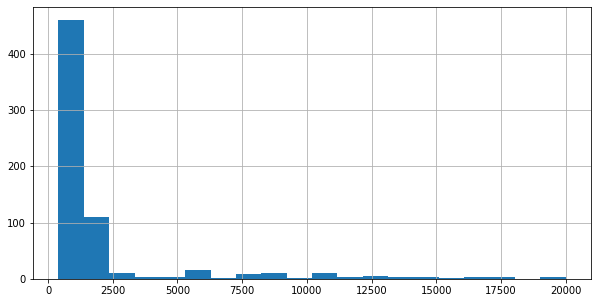

In [96]:
data[data['Power']>400]['Power'].hist(bins=20, figsize=[10,5])

В представленном списке моделей отсутствуют крупные пассажирские автобусы и грузовики, соответственно значения более 500 л.с. сочтены ошибочными. Аномальные значения мощности заменим на NaN и заполним полученные пропуски медианой по модели. 

In [97]:
data.loc[(data['Power']>500) | (data['Power']<=12), 'Power'] = np.nan
# замена аномалий пропусками

In [98]:
fill_median(data, 'Model', 'Power')
# заполнение с помощью объявленной выше функции

In [99]:
data.isna().sum()
# проверка оставшихся пропусков

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               1
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
DateCreated         0
dtype: int64

Для одной из записей медиану по модели получить не удалось. Эта запись будет удалена. Также будут осмотрены оставшиеся записи со значением мощности более 400 л.с.

In [100]:
data = data.dropna().reset_index(drop=True)

In [101]:
data[data['Power']>400]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired,DateCreated
2616,19500,suv,2004.0,auto,450.0,cayenne,125000,petrol,porsche,no,2016-03-16
3092,16899,wagon,2003.0,auto,476.0,e_klasse,150000,petrol,mercedes_benz,no,2016-03-10
4400,13900,sedan,2006.0,auto,476.0,e_klasse,150000,petrol,mercedes_benz,no,2016-03-25
5003,10999,wagon,2006.0,auto,435.0,other,150000,petrol,audi,yes,2016-03-27
9779,18900,wagon,2007.0,auto,420.0,3er,150000,petrol,bmw,no,2016-03-27
...,...,...,...,...,...,...,...,...,...,...,...
328618,19780,wagon,2003.0,auto,500.0,e_klasse,150000,petrol,mercedes_benz,no,2016-03-25
331484,10500,sedan,2003.0,auto,445.0,7er,150000,petrol,bmw,no,2016-03-11
331952,15999,wagon,2007.0,auto,435.0,other,150000,petrol,audi,no,2016-03-29
333575,20000,coupe,2006.0,auto,476.0,other,125000,petrol,mercedes_benz,no,2016-03-22


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

Полученные данные содержат информацию о реально существующих премиальных автомобилях. Большая часть аномальных значений исправлена.

Таким образом, пропуски устранены, аномальные значения обработаны. Можно разбить датасет на обучающие признаки и целевой признак и приступать к машинному обучению.

In [102]:
features = data.drop('Price', axis=1)
target = data['Price']

Для целей ML год регистрации будет преобразован в числовое значение - количество секунд от точки от счёта.

In [103]:
features["DateCreated"] = features["DateCreated"].astype(int)/10**9

In [104]:
features['DateCreated']

0         1.458778e+09
1         1.458778e+09
2         1.457914e+09
3         1.458173e+09
4         1.459382e+09
              ...     
333874    1.458346e+09
333875    1.459037e+09
333876    1.457136e+09
333877    1.458346e+09
333878    1.458432e+09
Name: DateCreated, Length: 333879, dtype: float64

In [105]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                              target,
                                                                              test_size=0.25,
                                                                             random_state=13)

## Обучение моделей

### RandomForestRegerssor

Перед обучением данной модели закодируем категориальные признаки способом ordinal encoding, подбор гиперпараметров и валидацию произведем с помощью GridSearchCV. 
#### Кодирование

In [106]:

encoder = OrdinalEncoder()

features_enc_train = encoder.fit_transform(features_train[categorial])
features_enc_train = pd.DataFrame(data=features_enc_train, index=features_train.index)
features_enc_train = features_enc_train.join(features_train.drop(categorial, axis=1), how='left')

In [107]:
features_enc_test = encoder.transform(features_test[categorial])
features_enc_test = pd.DataFrame(data=features_enc_test, index=features_test.index)
features_enc_test = features_enc_test.join(features_test.drop(categorial, axis=1), how='left')

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Кодировать данные стоит после разбиения. Так у нас не будет утечки данных.

Подробнее об этом можно прочитать здесь https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage
  
Суть в том, что в предобработке данных мы не должны заглядывать в тестовую выборку. Когда кодировщик fit-ится на всей выборке, там ведь есть и тестовая выборка, поэтому это называют утечкой или подглядыванием. 

P.S. после прямого кодирования кол-во столбцов в выборках может отличаться. Тогда лишние признаки можно удалить
</div>


<div class="alert alert-block alert-info">
<b>❌ Комментарий студента:</b>

Исправлено! см. выше. Применён ОрдиналЭнкодинг, обученный только на трейне. спасибо =)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Для прямого кодирования также есть вариант с fit и transform - OneHotEncoder из sklearn.
  
Вот блокнот с объяснением OneHotEncoder, make_column_transformer и make_pipeline:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

#### Обучение GridSearchCV() с эстиматором RandomForestRegressor() 

In [108]:
# При подборе гиперпараметров использовался этот param_grid, впоследствии закомментирован 
#для более быстрого выполнения ячейки.
# param_grid_forest = {'max_depth': list(range(1,15)),
# 'n_estimators': [30, 40, 50, 90, 100, 110],
#    'random_state': [13]}

In [109]:
# Здесь записаны лучшие полученные гиперпараметры - для быстродействия кода.
 param_grid_forest = {'max_depth': [14], 'n_estimators': [110], 'random_state': [13]}
 # best params


In [110]:
# объявляем инстанцию GridSearchCV с моделью случайного леса, param_grid заполненным выше и scoring 
# RMSE согласно требованиям заказчика. Число выборок кросс-валидации ограничим до 3х для ускорения работы кода.
grid_search_forest = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid_forest,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=1,
                           cv=3)

In [111]:
%%time
grid_search_forest.fit(features_enc_train, target_train) # обучение и кросс-валидация модели
print(grid_search_forest.best_params_) # выводим лучшие гиперпараметры
print(grid_search_forest.best_score_) # выводим наилучшее значение функции потерь

Fitting 3 folds for each of 84 candidates, totalling 252 fits
{'max_depth': 14, 'n_estimators': 110, 'random_state': 13}
-1705.4489685313504
CPU times: user 54min 16s, sys: 6.65 s, total: 54min 23s
Wall time: 54min 25s


Наилучшее значение RMSE при валидации - 1705

#### Проверка модели

In [112]:
%%time
print('RMSE модели GridSearchCV с эстиматором RandomForestRegressor на тестовой выборке:',
      (mean_squared_error(target_test, grid_search_forest.predict(features_enc_test)))**0.5)

RMSE модели GridSearchCV с эстиматором RandomForestRegressor на тестовой выборке: 1686.840181917091
CPU times: user 1.34 s, sys: 7.97 ms, total: 1.34 s
Wall time: 1.35 s


Модель RandomForestRegressor() показала метрику RMSE на тестовой выборке 1686.8, что соответствует критериям заказчика.

Процесс обучения и перебора гиперпараметров занял 54 минуты при обработке 252 вариантов.
Процесс тестирования занял менее полутора секунд.

Подобраны лучшие гиперпараметры: 'max_depth': 14, 'n_estimators': 110

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для моделей, основанных на деревьях решений, лучше использовать порядковое кодирование (OrdinalEncoder). Это должно ускорить их работу. Так как при большом количестве признаков, модель будет долго искать оптимальный сплит.
</div>


<div class="alert alert-block alert-info">
<b>❌ Комментарий студента:</b>

Исправлено - см пункт 3.1.1. Использован OrdinalEncoder, который обучен только на трэйне. 
</div>


<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### LightGBM Regressor
#### Приведение типов данных

Для LightGBMRegressor переведём категориальные признаки в тип данных category.

In [113]:
features_cat_train = features_train
features_cat_test = features_test
for column in categorial:
    features_cat_train.loc[:, column] = features_cat_train.loc[:, column].astype('category')
    features_cat_test.loc[:, column] = features_cat_test.loc[:, column].astype('category')
    
features_cat_train.info()
features_cat_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250409 entries, 120015 to 178352
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   VehicleType       250409 non-null  category
 1   RegistrationYear  250409 non-null  float64 
 2   Gearbox           250409 non-null  category
 3   Power             250409 non-null  float64 
 4   Model             250409 non-null  category
 5   Kilometer         250409 non-null  int64   
 6   FuelType          250409 non-null  category
 7   Brand             250409 non-null  category
 8   Repaired          250409 non-null  category
 9   DateCreated       250409 non-null  float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 19.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83470 entries, 62500 to 26826
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   VehicleType       

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Как видно из информации о данных, типы данных приведены.

#### Обучение и кросс-валидация модели

In [114]:
# Эти гиперпараметры использовались при подборе лучших. Закомментированы для быстродействия кода.
# param_grid_lgbm = {'max_depth': [1, 2, 3, 5, 10, 15, 20],
#                    'num_leaves': [10, 20, 31, 41, 51],
#                    'n_estimators': [10, 20, 30, 50, 100, 150],
#                    'random_state': [13]}

In [115]:
# Это лучшие подобранные гиперпараметры, записаны в переменную для быстродействия кода.
param_grid_lgbm = {'max_depth': [-1],
                   'num_leaves': [51],
                    'n_estimators': [150],
                   'random_state': [13]}

In [116]:
# Объявляем инстанцию GridSearchCV с эстиматором LGBMRegressor
grid_search_lgbm = GridSearchCV(estimator=LGBMRegressor(),
                           param_grid=param_grid_lgbm,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=1,
                           cv=3)

In [117]:
%%time
grid_search_lgbm.fit(features_cat_train, target_train)
print(grid_search_lgbm.best_params_)
print(grid_search_lgbm.best_score_)

Fitting 3 folds for each of 210 candidates, totalling 630 fits
{'max_depth': 15, 'n_estimators': 150, 'num_leaves': 51, 'random_state': 13}
-1592.1037853764344
CPU times: user 33min 20s, sys: 10.1 s, total: 33min 31s
Wall time: 33min 46s


Данная модель при кросс-валидации показала RMSE 1592.

Процесс подбора гиперпараметров и кросс-валидации занял менее 34 минут.
#### Тестирование модели

In [118]:
%%time
print('RMSE модели GridSearchCV с эстиматором LightGBM Regressor на тестовой выборке:',
      (mean_squared_error(target_test, grid_search_lgbm.predict(features_cat_test)))**0.5)

RMSE модели GridSearchCV с эстиматором LightGBM Regressor на тестовой выборке: 1591.0467486203884
CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 1.32 s


Модель LGBMRegressor() получила RMSE 1592 при валидации и 1591 при тестировании, что соответствует требованиям заказчика. 

Процесс обучения и кросс-валидации модели занял менее 34 минут.
Процесс тестирования - менее 2х секунд.

Оптимальные гиперпараметры: 'max_depth': 15, 'n_estimators': 150, 'num_leaves': 51

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

У бустингов под капотом есть возможность кодировать категориальные признаки:
 
1. CatBoost. Нужно категориальные признаки передать в параметр `cat_features`.
2. LightGBM. Нужно изменить тип данных категориальных признаков с `object` на `category`.
</div>


<div class="alert alert-block alert-info">
<b>⚠️Комментарий студента</b>
Тип данных изменен, см пункт 3.2.1.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Линейная регрессия
#### Подготовка датасета
Для обучения линейной регрессии трансформируем данные с помощью StandardScaler()

In [119]:
%%time
scaler = StandardScaler()

features_scal_train = scaler.fit_transform(features_enc_train)
features_scal_test = scaler.transform(features_enc_test)


CPU times: user 60.8 ms, sys: 4 µs, total: 60.8 ms
Wall time: 118 ms


#### Обучение и кросс-валидация модели

In [120]:
%%time
# кросс-валидация на обучающей выборке
linear_model = LinearRegression()
cv = cross_validate(estimator=linear_model,
                   X=features_scal_train,
                   y=target_train,
                    scoring='neg_root_mean_squared_error',
                    cv=3)

CPU times: user 248 ms, sys: 251 ms, total: 499 ms
Wall time: 474 ms


In [121]:
cv['test_score'].mean()

-2894.4200615080313

Время обучения и кросс-валидации линейной регрессии составило менее секунды, при этом среднее значение RMSE при кросс-валидации превышает заданный порог.

#### Тестирование модели
При кросс-валидации RMSE модели оказалась слишком высокой. Протестируем модель на тестовой выборке.

In [122]:
%%time
linear_model.fit(features_enc_train, target_train)


CPU times: user 69.1 ms, sys: 18.7 ms, total: 87.8 ms
Wall time: 53.5 ms


LinearRegression()

In [123]:
%%time
print('RMSE модели LinearRegression на тестовой выборке:',
      (mean_squared_error(target_test, linear_model.predict(features_enc_test)))**0.5)

RMSE модели LinearRegression на тестовой выборке: 2904.107325588452
CPU times: user 8.79 ms, sys: 29.9 ms, total: 38.7 ms
Wall time: 7.49 ms


Обучение модели заняло менее секунды. Выполнение предсказаний на тестовой выборке заняло менее 0.1 с, однако RMSE 2904 превышает заданный заказчиком порог 2500. 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Модель обучена корректно 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для линейных моделей стоит масштабировать численные признаки
</div>


<div class="alert alert-block alert-info">
<b>❌ Комментарий студента:</b>

Пожалуйста, посмотри еще раз пункт 3.3.1 - там есть ошибка в применении скейлера? На данном этапе не знаю, что в нем надо менять =(
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
    
Нет, все верно)
</div>

## Анализ моделей
В рамках данной работы были исследованы модели RandomForestRegressor(), LightGBMResressor(), LinearRegression().
### RandomForestRegressor
- Обучение и кросс-валидация с помощью GridSearchCV заняла 54 минуты;
- Оптимальные гиперпараметры: 'max_depth': 14, 'n_estimators': 110;
- RMSE при кросс-валидации 1705.4;
- RMSE на тестовой выборке 1686.8;
- Время предсказания на тестовой выборке менее 2 с.


### LightGBMResressor
- Обучение и кросс-валидация с помощью GridSearchCV заняла менее 34 минут;
- Оптимальные гиперпараметры: 'max_depth': 15, 'n_estimators': 150, 'num_leaves': 51;
- RMSE при кросс-валидации 1592;
- RMSE на тестовой выборке 1591;
- Время предсказания на тестовой выборке менее 2 с.


### LnearResression
- Кросс-валидация с помощью cross_validation заняла менее секунды;
- Обучение заняло менее секунды;
- RMSE при кросс-валидации 2894;
- RMSE на тестовой выборке 2904;
- Время предсказания на тестовой выборке - менее секунды.

### Лучшая модель

- Необходимой точности предсказаний достигли модели RandomForestRegressor и LGBMRegressor.
- Из них более низкое RMSE (1591) получено при тестировании LGBMRegressor.
- Время обучения, подбора гиперпараметров и кросс-валидации RandomForestRegressor - около часа.
- Время обучения, подбора гиперпараметров и кросс-валидации LGBMRegressor - около получаса.
- Время предсказания RandomForestRegressor и LGBMRegressor - приблизительно одинаково, составило около 1.5 с.

На основании полученных данных лучшей моделью признана LGBMRegressor в связи с наиболее высокой точностью предсказаний и приемлемым временем обучения.






<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует анализу 👍 Значит рекомендуем заказчику LGBM
</div>

## Вывод

### Цель исследования:
- Построить модель, способную определять рыночную стоимость автомобиля.

### Задачи исследования:
- Изучить предоставленные данные и произвести предварительную обработку;
- Подготовить выюорки для обучения и тестирования моделей;
- Обучить модели ML, в том числе LightGBM.
- Проанализировать время обучения, время предсказания и качество моделей по показателю RMSE (не должен превышать 2500);
- Выбрать лучшую модель.

### Материалы и методы:
Работа выполнена с помощью программного обеспечения JupiterHub средствами Python, библиотек pandas, numpy, sklearn, lightgbm. Использовался датасет объявлений о продажах автомобилей с 2014 по 2016гг, предоставленный заказчиком.

### Ход исследования:
Выполнены следующие шаги:
- Предварительная обработка данных:
    - Исследование информации о данных;
    - Приведение типов данных;
    - Поиск дубликатов;
    - Поиск и обработка пропусков;
    - Выявление и обработка аномальных значений;
    - Подготовка выборок для ML;
    - Кодирование и масштабирование выборок.
- Обучение, кросс-валидация и тестирование моделей:
    - GridSearchCV с эстиматором RandomForestRegressor;
    - GridSearchCV с эстиматором LGBMRegressor;
    - Линейная регрессия.
- Анализ результатов машинного обучения.

### Результаты исследования:

Лучшей моделью признан LGBMRegressor:
- Обучение и кросс-валидация с помощью GridSearchCV заняла 33 минуты;
- Оптимальные гиперпараметры: 'max_depth': 15, 'n_estimators': 150, 'num_leaves': 51;
- RMSE при кросс-валидации 1592;
- RMSE на тестовой выборке 1591;
- Время предсказания на тестовой выборке менее 2 с.


Данная модель может быть рекомендована для практического применения.


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"



<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Еще раз спасибо =) теперь модели обучаются во много раз быстрее. С рекомендованной литературой ознакомлюсь!
</div>